In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Statistics
from pyevolve import DBAdapters
from pyevolve import G1DList
import math
import random

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]


# LAT = [0, 1, 5, 6, 2]
# LON = [0, 0, 0, 0, 0]

class City:
    """
    Represent a City
    """
    
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
    
    def distance(self, city2):
        return math.sqrt(math.fabs(self.lat - city2.lat) ** 2 + math.fabs(self.lon - city2.lon) ** 2)
    
    def __repr__(self):
        return "{" + str(self.lat) + " " + str(self.lon) + "}"
    
def travel(cities):
    """
    Compute the total travel to visit each city
    """
    
    # score
    travel = 0.0
    
    for i in xrange(0, len(cities) - 1):
        # Distance between city_i and city_i+1
        travel += cities[i].distance(cities[i + 1])

    return travel


def fitness(chromosome):    
    chromosomeCities = map(lambda i: City(LAT[i], LON[i]), chromosome)

    return 1000 - travel(chromosomeCities)

In [3]:
# chromosomeCities = map(lambda x, y: City(x, y), LAT, LON)
# print(travel(chromosomeCities))

def G1DListTSPInitializator(genome, **args):
    """ The initializator for the genome """

    newGenomeInternal = [i for i in xrange(genome.getListSize())]
    random.shuffle(newGenomeInternal)
    genome.setInternalList(newGenomeInternal)

# Chromosome representation
genome = G1DList.G1DList(len(LON))

# genome = bitstring
genome.initializator.set(G1DListTSPInitializator)
genome.setParams(rangemin=0, rangemax=len(LON)-1)

# Compute the fitness (the travel)
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome, seed=123)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.0) # we remove the crossover, we must visit each city
ga.selector.set(Selectors.GTournamentSelector)
ga.setElitism(True)

sqlite_adapter = DBAdapters.DBSQLite(identify="TheTravelingSalesmanProblem")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(200)

# In case we want to monitor the evolution process
# execute the function current_best every generation
# ga.stepCallback.set(current_best)

ga.evolve(freq_stats=10)

# Final best solution
print ga.bestIndividual()

NameError: name 'DBAdapters' is not defined

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


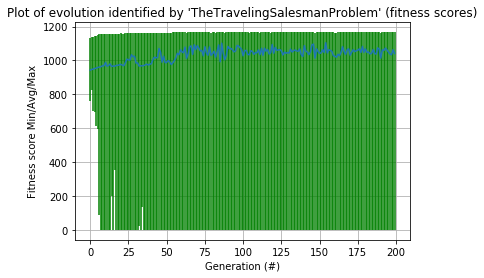

In [200]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/anaconda2/bin/pyevolve_graph.py -i TheTravelingSalesmanProblem -2

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


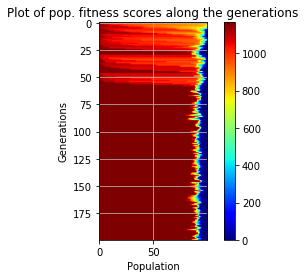

In [201]:
# Generate a heatmap of population fitness score distribution over generations
%run ~/anaconda2/bin/pyevolve_graph.py -i TheTravelingSalesmanProblem -9